# Práctica 1 - Self-Organising Maps - COLORES
## Preparación de entorno
#### Importar librerías de código

In [1]:
# from __future__ import division

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches as patches

%matplotlib inline

#### Dataset que se va a utilizar para el entrenamiento

In [2]:
# Código para obtener el Dataset que se va a usar en el entrenamiento
valor_min = 0
valor_max = 255
valores_colores = 100
num_colores = 3
datos = np.random.randint(valor_min, valor_max, (valores_colores, num_colores))
# Introducimos los datos del enunciado en 'datos':
    # - Valor_min = 0
    # - Valor_max = 255
    # - Valores_colores = escogemos un valor aleatorio, en este caso 175 
    # - Num_colores = 100


## SOM Setup
#### Variables definidas por el alumno

In [3]:
# Inicializa tamaño del mapa de Kohonen, número de iteraciones y learning rate
# Inicializa normalizar_datos dependiendo de si tienes que normalizar los datos o no
lado_mapa = 30
periodo = 10000
learning_rate = 0.1
normalizar_datos = True # Hay que reducir la escala de los datos de 0-255 a 0-1

#### A partir de este punto solo hay cálculos. No se introducen más valores "a mano"

In [4]:
# Establece el numero de entradas del mapa y el número de datos que se van a usar para entrenar. 
# Utiliza una función que obtenga automáticamente los valores a partir del Dataset.
num_entradas = num_colores
num_datos = valores_colores

# Calcula el vecindario inicial. Debe ser la mitad del lado del mapa de Kohonen
vecindario = lado_mapa / 2

# Normaliza los datos si fuese necesario dividiendo cada dato por el máximo en la matriz
if normalizar_datos:
    datos = datos / valor_max
    
# Crea una matriz de pesos con valores random entre 0 y 1. Usa la función random.random de la librería NumPy
#matriz_pesos = np.random.random((dimensiones de la matriz de pesos))

#### Funciones para entrenar/clasificar

In [5]:
# Función para encontrar la BMU
"""
   Encuentra la BMU para un patrón de entrada.
   Entradas: (patrón_de_entrada, matriz_de_pesos, número_de_entradas)
   Salidas:  (bmu, bmu_idx) tupla donde
               bmu: vector de pesos de la neurona ganadora
               bum_idx: coordenadas de la neurona ganadora
"""
def calcular_bmu(patron_entrada, m_pesos, m): # patron_entrada y m_pesos, dimensiones 10 x 10
    # Dj = sqrt(N_sum(xi - wij)**2)
    bmu_index_temp = np.array([0, 0])
    dist_bmu_temp = 1000
    
    for i in range(m):     
        for j in range(m):
            temp = 0
            for k in range(num_colores):
                temp += (patron_entrada[k] - m_pesos[i][j][k])**2
            temp = np.sqrt(temp)
    
            if(temp < dist_bmu_temp):
                bmu_index_temp[0] = i
                bmu_index_temp[1] = j
                dist_bmu_temp = temp
    '''
    bmu = []
    for k in range(num_colores):
        bmu.append(m_pesos[(bmu_index_temp[0])][(bmu_index_temp[1])][k])'''
    return (bmu_index_temp)
    
    '''
    def distance(vect_a, vect_b):
            dist = np.linalg.norm(vect_a - vect_b)'''


In [6]:
# Función para calcular el descenso del coeficiente de aprendizaje (eta)
"""
   Calcula el Learning Rate (eta) que corresponde a la i-ésima presentación.
   Entradas: (learning_rate_inicial, iteracion, período)
   Salidas:  learning_rate para la iteración i

"""
def variacion_learning_rate(lr_inicial, i, n_iteraciones):
    lr_actual = lr_inicial*(1-(i/n_iteraciones))
    return lr_actual

In [7]:
# Función para calcular el descenso del vecindario (v)
"""
   Calcula el vecindario  (v) que corresponde a la i-ésima presentación.
   Entradas: (vecindario_inicial, iteracion, período)
   Salidas:  lvecindario para la iteración i

"""
def variacion_vecindario(vecindario_inicial, i, n_iteraciones):
    vecindario_actual = 1 + (vecindario_inicial * (1 - (i/n_iteraciones)))
    return vecindario_actual

In [8]:
# Función para calcular el descenso del coeficiente de aprendizaje (eta) en función de la distancia a la BMU
"""
   Calcula la amortiguación de eta en función de la distancia en el mapa entre una neurona y la BMU.
   Entradas: (distancia_BMU, vecindario_actual)
   Salidas:  amortiguación para la iteración

"""

def dist_BMU(BMU_index, i, j):
    res = np.sqrt( (BMU_index[0]-i)**2  +  (BMU_index[1]-j)**2)
    return res

def decay(distancia_BMU, vecindario_actual):
    return np.exp(-distancia_BMU**2 / (2*vecindario_actual**2))

#### Funciones para dibujar la salida de la red

In [9]:
# Función para pintar una matriz de valores como colores RGB
def pintar_mapa(matriz_valores, iteraciones):
    fig = plt.figure()
    
    # Establece ejes
    ax = fig.add_subplot(111, aspect='equal')
    ax.set_xlim((0, matriz_pesos.shape[0]+1))
    ax.set_ylim((0, matriz_pesos.shape[1]+1))
    ax.set_title('Self-Organising Map después de %d iteraciones' % iteraciones)

    # Dibuja los rectángulos de color RGB
    for x in range(1, matriz_valores.shape[0] + 1):
        for y in range(1, matriz_valores.shape[1] + 1):
            ax.add_patch(patches.Rectangle((x-0.5, y-0.5), 1, 1,
                         facecolor=matriz_valores[x-1,y-1,:],
                         edgecolor='none'))
    plt.show()

## SOM Entrenamiento

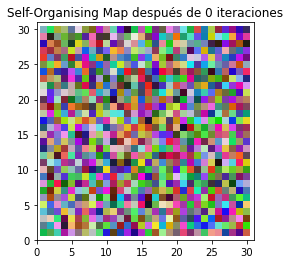

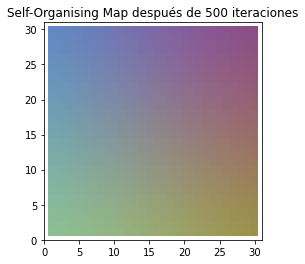

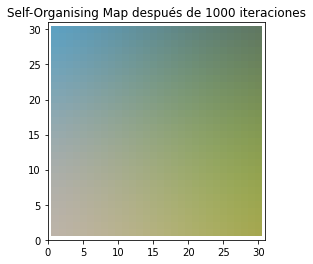

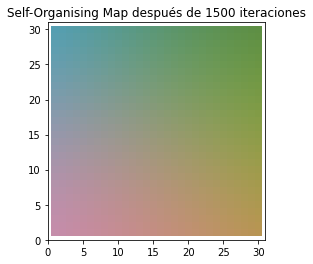

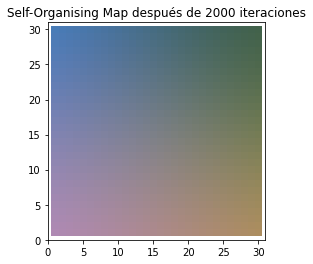

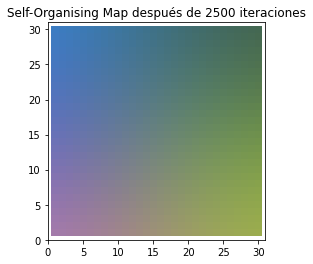

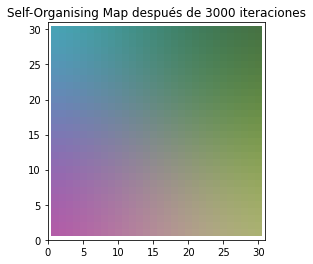

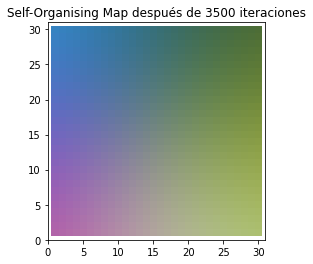

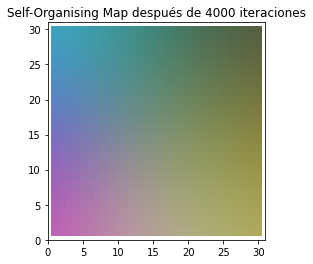

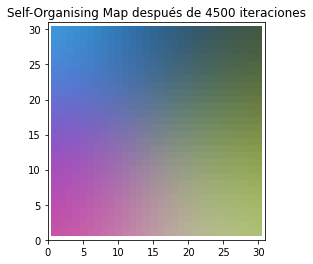

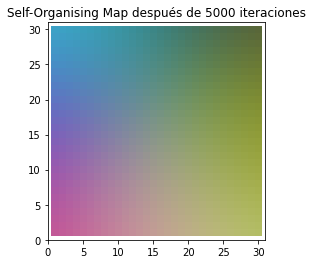

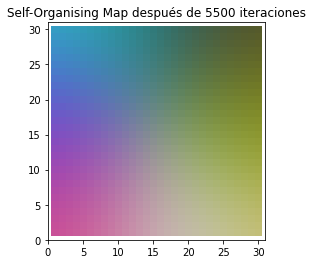

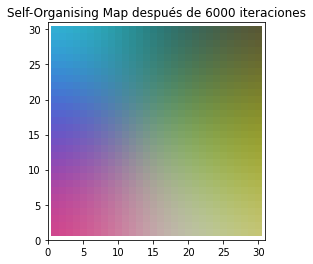

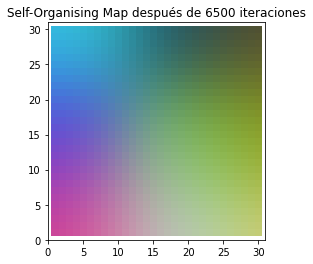

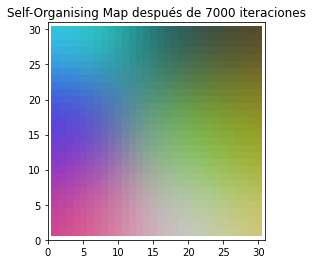

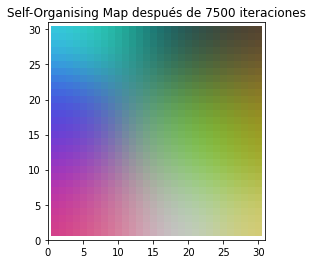

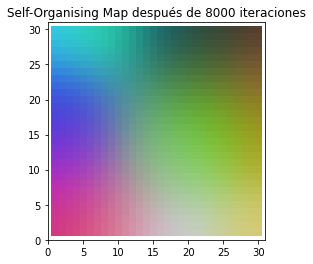

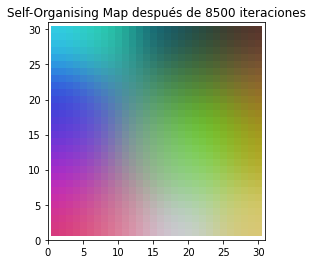

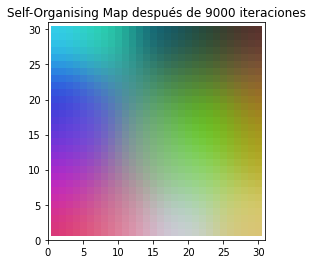

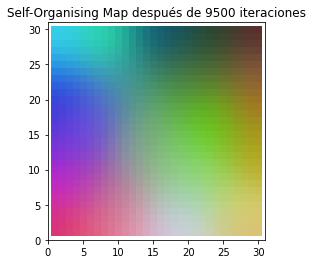

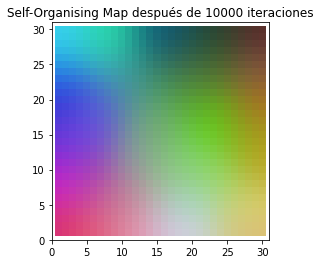

In [10]:
# Entrena la red con el dataset de entrenamiento
import random
matriz_pesos = np.random.randint(0, 1000, (lado_mapa, lado_mapa, num_colores))/1000


for a in range(periodo):
    # ETA (aprendizaje LR), V (vecindario)
    patron_entrada = random.choice(datos)
    BMU_index = calcular_bmu(patron_entrada, matriz_pesos, lado_mapa)
    
    for i in range(lado_mapa):
        for j in range(lado_mapa):
            for k in range(num_colores):
                matriz_pesos[i][j][k] = matriz_pesos[i][j][k] + (variacion_learning_rate(learning_rate, a, periodo) * decay(dist_BMU(BMU_index, i, j), variacion_vecindario(vecindario, a, periodo)) * (patron_entrada[k] - matriz_pesos[i][j][k]) )        
    
    if (a % 500 == 0):
        pintar_mapa(matriz_pesos, a)
    
    # peso_nuevo[i][j][k] = peso_viejo[i][j][k] + (ETA * Amortiguacion * (patron_entrada - peso_viejo[i][j][k]))      

pintar_mapa(matriz_pesos, periodo)

    
    

## SOM Clasificación

In [21]:
# Clasifica los patrones de entrenamiento con la matriz de pesos recién entrenada
m_clasificacion = np.zeros((lado_mapa, lado_mapa, num_colores))
m_activaciones = np.zeros((lado_mapa, lado_mapa))
m_distancias = np.zeros((lado_mapa, lado_mapa))

print("Best Matching Unit (x y): ")

for i in range(len(datos)):
    bmu_index = calcular_bmu(datos[i], matriz_pesos, lado_mapa)
    #print(bmu_index)

    for j in range(num_colores):
        m_clasificacion[bmu_index[0]][bmu_index[1]][j] = datos[i][j]

    m_activaciones[bmu_index[0]][bmu_index[1]] += 1
    
    # Falta mapa de distancias





Best Matching Unit (x y): 


array([[[0.61568627, 0.21568627, 0.42352941],
        [0.83137255, 0.10196078, 0.45098039],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.0627451 , 0.84313725, 0.94901961],
        [0.23137255, 0.81176471, 0.99607843]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.90588235, 0.27843137, 0.29411765],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       ...,

       [[0.83137255, 0.70196078, 0.50980392],
        [0.        , 0.        , 0.        ],
        [0.85882353, 0

## SOM Prueba

In [12]:
# Clasifica nuevos patrones

